In [0]:
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import seaborn as sn
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

###############################################################################

def loadData(filename):
    X = np.loadtxt(filename)
    return X
    
X_train = loadData('/content/drive/My Drive//stats/HumanActivityRecognition/UCI HAR Dataset/train/X_train.txt')
y_train = loadData('/content/drive/My Drive//stats/HumanActivityRecognition/UCI HAR Dataset/train/y_train.txt')
X_test = loadData('/content/drive/My Drive//stats/HumanActivityRecognition/UCI HAR Dataset/test/X_test.txt')
y_test = loadData('/content/drive/My Drive//stats/HumanActivityRecognition/UCI HAR Dataset/test/y_test.txt')

###############################################################################

def total_count(y):
    count = np.zeros(6)
    for i in range(y.size):
        if (y[i] == 1):
            count[0] += 1
        if (y[i] == 2):
            count[1] += 1
        if (y[i] == 3):
            count[2] += 1
        if (y[i] == 4):
            count[3] += 1
        if (y[i] == 5):
            count[4] += 1
        if (y[i] == 6):
            count[5] += 1
    return count

y_test_count = total_count(y_test)

def confusion_matrix(y_test, y_pred):
    cm = np.zeros((6, 6))
    for i in range(6):
        for j in range(6):
            for k in range(y_pred.size):
                if (y_pred[k] == j + 1 and y_test[k] == i + 1):
                    cm[i][j] += 1
    df_cm = pd.DataFrame(cm, range(6), range(6))
    plt.figure(figsize = (8,8))
    sn.set()#(font_scale=1.4)#for label size
    sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size

    plt.show()
    return cm


def pre_rec(cm, count):
    perc = []
    for i in range(6):
        perc.append(float("{0:.2f}".format(cm[i][i] / count[i] * 100)))
    return perc
        
def overall_accuracy(cm, y_test):
    sum = 0
    for i in range(6):
        sum += cm[i][i]
    return float("{0:.2f}".format(sum * 100.0 / y_test.size))    
        
###############################################################################



Mounted at /content/drive/


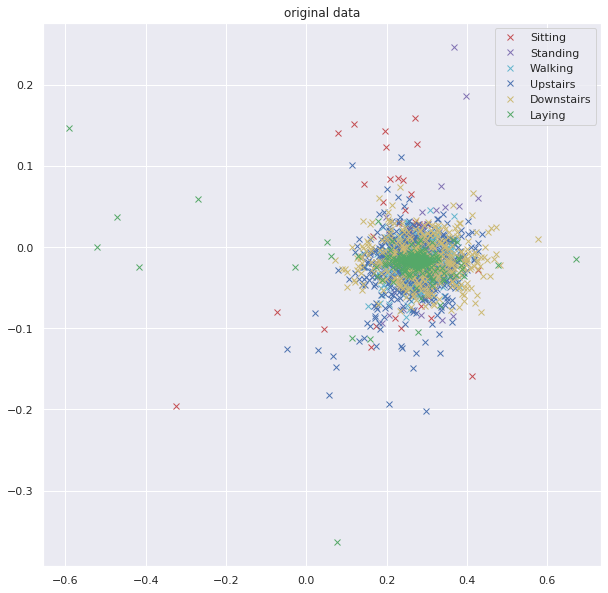

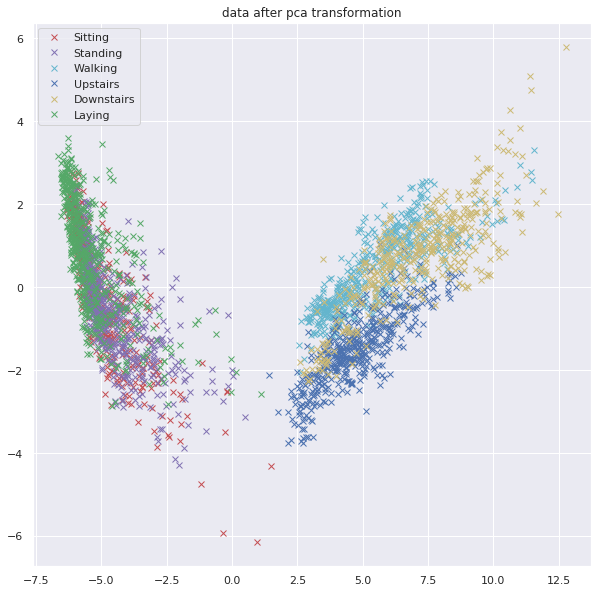

In [0]:
np.warnings.filterwarnings('ignore')
pca2 = PCA(n_components = 2)
pca2.fit(X_train)
X_train_2 = pca2.transform(X_train)
X_test_2 = pca2.transform(X_test)
objects = []
performance = []

arr = ['t1', 't2']
for data in arr:
    x11 = []
    x12 = []
    x21 = []
    x22 = []
    x31 = []
    x32 = []
    x41 = []
    x42 = []
    x51 = []
    x52 = []
    x61 = []
    x62 = []
    if data=='t1':
        x_val = X_test
        title = 'original data'
        loc = 'lower left'
    elif data=='t2':
        x_val = X_test_2
        title = 'data after pca transformation'
        loc = 'lower right'
    for i in range(len(y_test)):
        if (y_test[i] == 1): 
            x11.append(x_val[i][0])
            x12.append(x_val[i][1])
        elif (y_test[i] == 2):
            x21.append(x_val[i][0])
            x22.append(x_val[i][1])
        elif (y_test[i] == 3):
            x31.append(x_val[i][0])
            x32.append(x_val[i][1])
        elif (y_test[i] == 4):
            x41.append(x_val[i][0])
            x42.append(x_val[i][1])
        elif (y_test[i] == 5):
            x51.append(x_val[i][0])
            x52.append(x_val[i][1])
        else:
            x61.append(x_val[i][0])
            x62.append(x_val[i][1])

    fig= plt.figure(figsize=(10,10))
    plt.plot(x41, x42, 'xr')
    plt.plot(x51, x52, 'xm')     
    plt.plot(x11, x12, 'xc')
    plt.plot(x21, x22, 'xb')
    plt.plot(x31, x32, 'xy')
    plt.plot(x61, x62, 'xg')
    plt.gca().legend(('Sitting','Standing','Walking','Upstairs','Downstairs','Laying'))
    plt.title(title)
    plt.show()



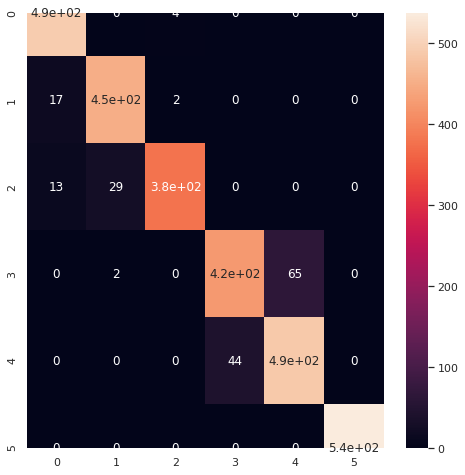


SVM with kernel = 'rbf':

Precision for SVM: 
[94.25, 93.58, 98.44, 90.6, 88.25, 100.0]
Recall for SVM: 
[99.19, 95.97, 90.0, 86.35, 91.73, 100.0]
Accuracy for SVM: 
94.03


In [0]:
###############################################################################
        
SVMK = SVC(probability = True)
SVMK.fit(X_train, y_train)
y_predict_svmk = SVMK.predict(X_test)

y_pred_count_svmk = total_count(y_predict_svmk)
cmatrix_svmk = confusion_matrix(y_test, y_predict_svmk)

print("\nSVM with kernel = 'rbf':")
#print(cmatrix_svmk)
print("")

recall_svmk = pre_rec(cmatrix_svmk, y_test_count)
precision_svmk = pre_rec(cmatrix_svmk, y_pred_count_svmk)
accuracy_svmk = overall_accuracy(cmatrix_svmk, y_test)
print("Precision for SVM: ")
print(precision_svmk)
print("Recall for SVM: ")
print(recall_svmk)
print("Accuracy for SVM: ")
print(accuracy_svmk)
objects.append('SVM with kernel=rbf')
performance.append(accuracy_svmk)
###############################################################################


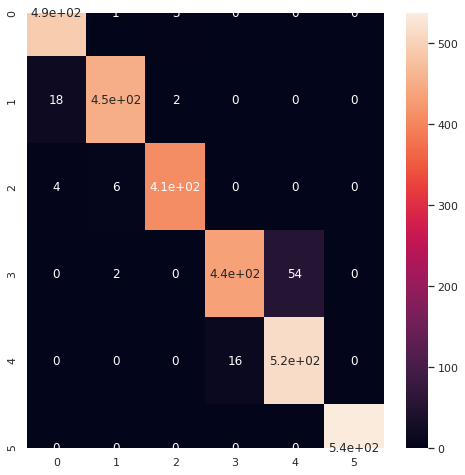


SVM with kernel = 'linear':

Precision for SVM: 
[95.72, 98.04, 98.8, 96.45, 90.53, 100.0]
Recall for SVM: 
[99.19, 95.75, 97.62, 88.59, 96.99, 100.0]
Accuracy for SVM: 
96.4


In [0]:
###############################################################################

SVMK2 = SVC(kernel='linear')
SVMK2.fit(X_train, y_train)
y_predict_svmk2 = SVMK2.predict(X_test)

y_pred_count_svmk2 = total_count(y_predict_svmk2)
cmatrix_svmk2 = confusion_matrix(y_test, y_predict_svmk2)

print("\nSVM with kernel = 'linear':")
#print(cmatrix_svmk2)
print("")

recall_svmk2 = pre_rec(cmatrix_svmk2, y_test_count)
precision_svmk2 = pre_rec(cmatrix_svmk2, y_pred_count_svmk2)
accuracy_svmk2 = overall_accuracy(cmatrix_svmk2, y_test)

print("Precision for SVM: ")
print(precision_svmk2)
print("Recall for SVM: ")
print(recall_svmk2)
print("Accuracy for SVM: ")
print(accuracy_svmk2)
objects.append('SVM with kernel=linear')
performance.append(accuracy_svmk2)
###############################################################################


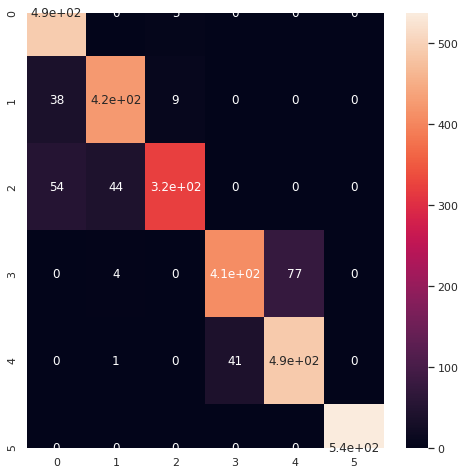


SVM with kernel = 'poly'

Precision for SVM: 
[84.22, 89.64, 95.83, 90.91, 86.42, 100.0]
Recall for SVM: 
[98.99, 90.02, 76.67, 83.5, 92.11, 100.0]
Accuracy for SVM: 
90.74


In [0]:

###############################################################################

SVMK3 = SVC(kernel='poly')
SVMK3.fit(X_train, y_train)
y_predict_svmk3 = SVMK3.predict(X_test)

y_pred_count_svmk3 = total_count(y_predict_svmk3)
cmatrix_svmk3 = confusion_matrix(y_test, y_predict_svmk3)

print("\nSVM with kernel = 'poly'")
#print(cmatrix_svmk3)
print("")

recall_svmk3 = pre_rec(cmatrix_svmk3, y_test_count)
precision_svmk3 = pre_rec(cmatrix_svmk3, y_pred_count_svmk3)
accuracy_svmk3 = overall_accuracy(cmatrix_svmk3, y_test)

print("Precision for SVM: ")
print(precision_svmk3)
print("Recall for SVM: ")
print(recall_svmk3)
print("Accuracy for SVM: ")
print(accuracy_svmk3)
objects.append('SVM with kernel=poly')
performance.append(accuracy_svmk3)
###############################################################################

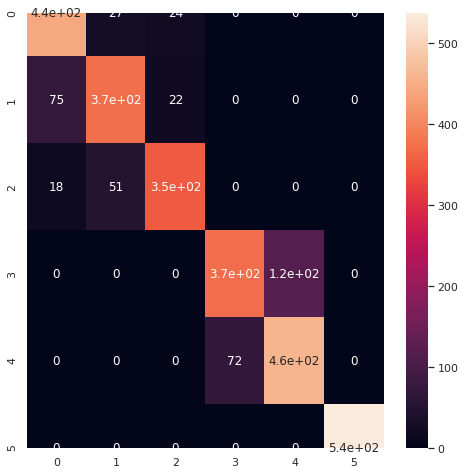

Precision for tree: 
[82.71, 82.74, 88.41, 83.78, 79.45, 100.0]
Recall for tree: 
[89.72, 79.41, 83.57, 75.76, 86.47, 100.0]
Accuracy for tree: 
86.16


In [0]:
###############################################################################
treCl = tree.DecisionTreeClassifier()
treCl = treCl.fit(X_train, y_train)
y_predict_tree = treCl.predict(X_test)

y_pred_count_tree = total_count(y_predict_tree)
cmatrix_tree = confusion_matrix(y_test, y_predict_tree)

recall_tree = pre_rec(cmatrix_tree, y_test_count)
precision_tree = pre_rec(cmatrix_tree, y_pred_count_tree)
accuracy_tree = overall_accuracy(cmatrix_tree, y_test)

print("Precision for tree: ")
print(precision_tree)
print("Recall for tree: ")
print(recall_tree)
print("Accuracy for tree: ")
print(accuracy_tree)
objects.append('Decision Tree')
performance.append(accuracy_tree)
###############################################################################


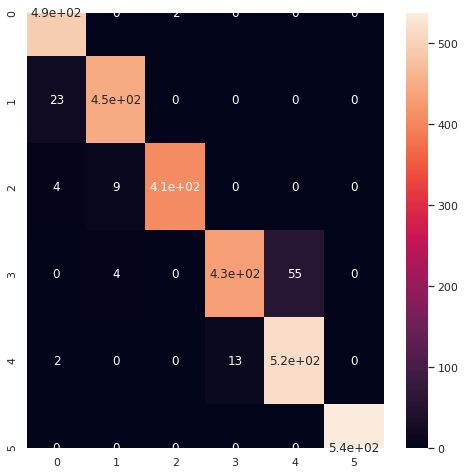

Precision for LR: 
[94.46, 97.18, 99.51, 97.08, 90.38, 100.0]
Recall for LR: 
[99.6, 95.12, 96.9, 87.98, 97.18, 100.0]
Accuracy for LR: 
96.2


In [0]:
###############################################################################
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predict_LR = clf.predict(X_test)

y_pred_count_LR = total_count(y_predict_LR)
cmatrix_LR = confusion_matrix(y_test, y_predict_LR)

recall_LR = pre_rec(cmatrix_LR, y_test_count)
precision_LR = pre_rec(cmatrix_LR, y_pred_count_LR)
accuracy_LR = overall_accuracy(cmatrix_LR, y_test)

print("Precision for LR: ")
print(precision_LR)
print("Recall for LR: ")
print(recall_LR)
print("Accuracy for LR: ")
print(accuracy_LR)
objects.append('Logistic Regression')
performance.append(accuracy_LR)
###############################################################################


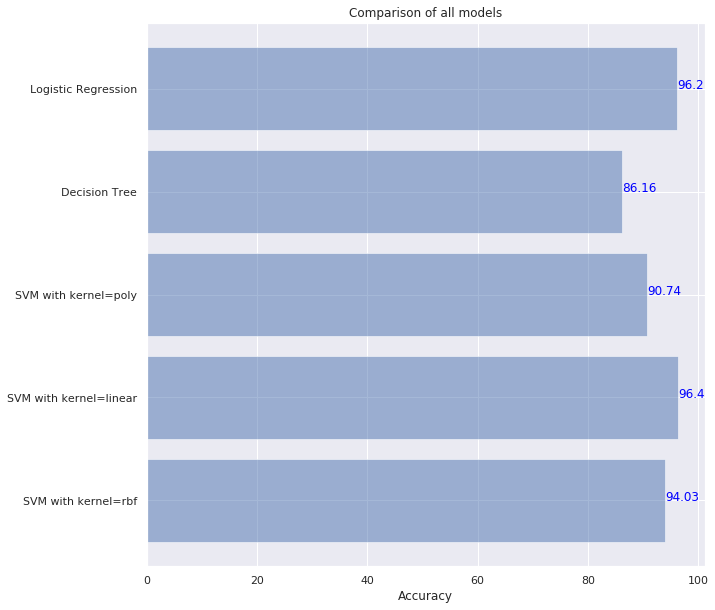

In [0]:
y_pos = np.arange(len(objects))
plt.figure(figsize = (10,10))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.title('Comparison of all models')
for i, v in enumerate(performance):
    plt.text(v, i, str(v), color='blue')
plt.show()